In [10]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

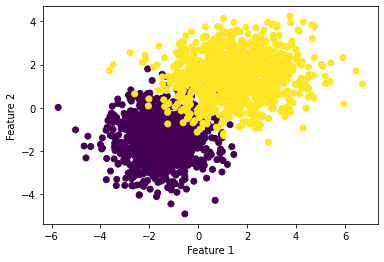


 Covariance Matrix 
 [[3.82244019 2.28617627]
 [2.28617627 3.16980311]]

Eigen Values :  [5.80546912 1.18677418]

Eigen Vectors
 [[ 0.7554149  -0.65524677]
 [ 0.65524677  0.7554149 ]]

 Variances :  [0.8302727560160702, 0.1697272439839299]



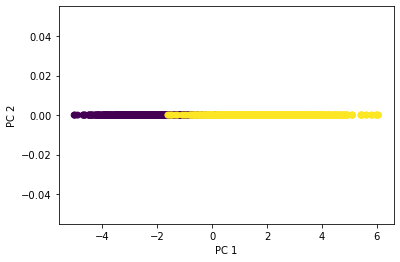

In [68]:
df = pd.read_excel("pca_data.xlsx")

# standardise each feature about mean
df["feature 1"] -= df["feature 1"].mean()
df["feature 2"] -= df["feature 2"].mean()

# plotting initial data
plt.scatter(df["feature 1"], df["feature 2"], c=df["class"])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# extracting corresponding classes
class_ = df["class"]
df = df.drop("class",axis=1)

# calculating cov matrix
cov_matrix = np.cov(df.T) # T -> accessor for transpose
print("\n Covariance Matrix \n",cov_matrix)

# calculating Eigens
Evalues, Evectors = np.linalg.eig(cov_matrix)
print()
print("Eigen Values : ",Evalues)
print()
print("Eigen Vectors\n",Evectors)

# calculating variances
variances = []
for i in range(len(Evalues)):
    variances.append(Evalues[i] / np.sum(Evalues))

print("\n Variances : ", variances)
print()

# Projecting the data along new dimensions
projected = df.dot(Evectors.T[0])
res = pd.DataFrame(projected, columns=["PCA"])
res["class"] = class_

# Plotting the PCA-ed data
plt.scatter(res["PCA"],len(df)*[0],c=res["class"])
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

Covariance Matrix: [[3.82244019 2.28617627]
 [2.28617627 3.16980311]]
Eigen Values: [5.80546912 1.18677418]
Eigen Vectors: [[ 0.7554149  -0.65524677]
 [ 0.65524677  0.7554149 ]]
energies: [0.8302727560160702, 0.1697272439839299]
        PCA  class
0 -3.715680      1
1 -1.833912      1
2 -4.230755      1
3 -1.380855      1
4 -1.663798      1


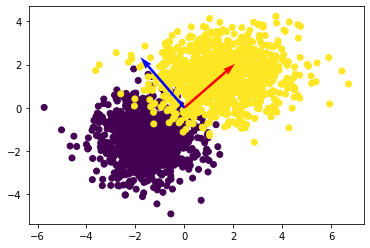

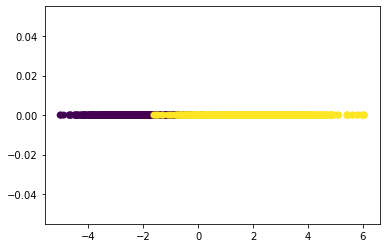

In [65]:
df = pd.read_excel("pca_data.xlsx")

df["feature 1"]=df["feature 1"]-df["feature 1"].mean()
df["feature 2"]=df["feature 2"]-df["feature 2"].mean()

plt.scatter(df["feature 1"],df["feature 2"],c=df["class"])
plt.plot()

class_=df["class"]
df=df.drop("class",axis=1)
cov_matrix = np.cov(df.T)

print("Covariance Matrix:",cov_matrix)
values, vectors = np.linalg.eig(cov_matrix)
print("Eigen Values:",values)
print("Eigen Vectors:",vectors)

energies = []
for i in range(len(values)):
    energies.append(values[i] / np.sum(values))

print("energies:",energies)

projected =df.dot(vectors.T[0])
res = pd.DataFrame(projected, columns=["PCA"])
res["class"] = class_
print(res.head())
origin = [0,0]
plt.quiver(*origin,*vectors[:,0],color="red",scale=5)
plt.quiver(*origin,*vectors[:,1],color="blue",scale=5)
plt.show()
plt.scatter(res["PCA"],len(df)*[0],c=res["class"])
plt.plot()
plt.show()

Covariance Matrix: [[8.98042685 0.2436364 ]
 [0.2436364  2.76555881]]
Eigen Values: [8.98996329 2.75602237]
Eigen Vectors: [[ 0.99923483 -0.03911217]
 [ 0.03911217  0.99923483]]
energies: [0.7653647426772392, 0.23463525732276072]
        PCA  class
0  0.514331      1
1 -0.371018      1
2 -2.393389      1
3 -0.625520      1
4  0.255364      1


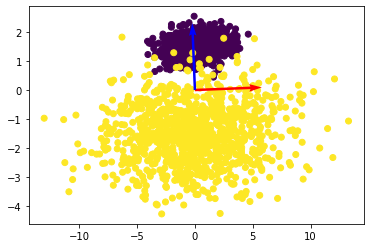

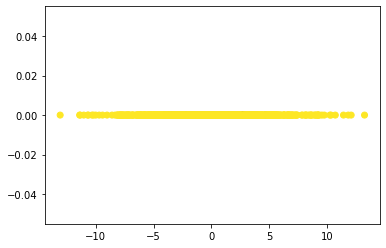

In [67]:
df = pd.read_excel("lda_data.xlsx")

df["feature 1"]=df["feature 1"]-df["feature 1"].mean()
df["feature 2"]=df["feature 2"]-df["feature 2"].mean()

plt.scatter(df["feature 1"],df["feature 2"],c=df["class"])
plt.plot()

class_=df["class"]
df=df.drop("class",axis=1)
cov_matrix = np.cov(df.T)

print("Covariance Matrix:",cov_matrix)
values, vectors = np.linalg.eig(cov_matrix)
print("Eigen Values:",values)
print("Eigen Vectors:",vectors)

energies = []
for i in range(len(values)):
    energies.append(values[i] / np.sum(values))

print("energies:",energies)

projected =df.dot(vectors.T[0])
res = pd.DataFrame(projected, columns=["PCA"])
res["class"] = class_
print(res.head())
origin = [0,0]
plt.quiver(*origin,*vectors[:,0],color="red",scale=5)
plt.quiver(*origin,*vectors[:,1],color="blue",scale=5)
plt.show()
plt.scatter(res["PCA"],len(df)*[0],c=res["class"])
plt.plot()
plt.show()

[[8.98042685 0.2436364 ]
 [0.2436364  2.76555881]] [[17.96950901  0.44927945]
 [ 0.44927945  1.15774932]]
[[-8.98908216 -0.20564304]
 [-0.20564304  1.6078095 ]]
[[-0.50065746 -0.04661796]
 [ 0.01666342  1.40682786]]
eigen vectors: [[-0.99996183  0.02443741]
 [ 0.00873734 -0.99970136]]
eigen values: [-0.50025013  1.40642053]
target eigen vector: [[ 0.02443741]
 [-0.99970136]]


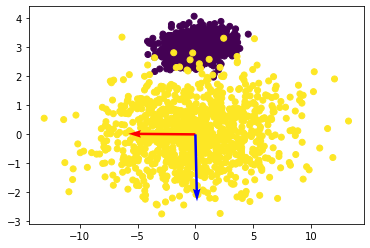

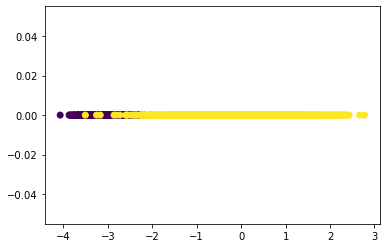

Original Data Size: (2000, 2) 
Modified Data Size: (2000, 1)


In [64]:
df = pd.read_excel("lda_data.xlsx");

X = df[['feature 1', 'feature 2']].values
Y = df[['class']].values
origin=[0,0]
plt.scatter(X[:,0], X[:, 1], c = Y[:,0])


classes = np.unique(Y)
nclasses = len(classes)

St = np.cov(X.T)   ## total scatter mat (~u-xij)^2
Sw = 0                          ## within class scatter (~ui - xij)^2
for i in range(nclasses):
    class_items = np.flatnonzero(Y == classes[i])
    Sw = Sw + np.cov(X[class_items].T)
print(St,Sw)
Sb = St - Sw      ## between class scatter (~u - ~ui)^2
print(Sb)
print(np.linalg.pinv(Sw).dot(Sb))
values, vectors = np.linalg.eig(np.linalg.pinv(Sw).dot(Sb)) ## get eigenvectors of Sw^(-1)*Sb
print("eigen vectors:",vectors) 
print("eigen values:",values)  #eig_value[1] is greater


Xf = X.dot(vectors[:,1].reshape(vectors.shape[0],1)) #project on eigenvector with greater eigen value
print("target eigen vector:",vectors[:,1].reshape(vectors.shape[0],1))
plt.quiver(*origin, *vectors[:,0], color="red", scale=5)
plt.quiver(*origin, *vectors[:,1], color="blue", scale=5)
plt.show()
plt.scatter(Xf[:,0], np.zeros_like(Xf[:,0]), c = Y)
plt.show()

print("Original Dimension:",X.shape, "\nModified Dimensions:", Xf.shape)